In [1]:
from clusterga.ga import ga
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/data.csv', delimiter=';')
df2 = pd.read_csv('./data/data2.csv', delimiter=';')
a = df2['Z-Estimate'].tolist()
df['Z2-Estimate'] = a
df = df[['Z-Estimate', 'Z2-Estimate']]
X = df.values
BBox = ((df2['X-Coordinate'].min(),   df2['X-Coordinate'].max(),      
         df2['Y-Coordinate'].min(), df2['Y-Coordinate'].max()))
X = MinMaxScaler().fit_transform(X)

## Calinski Harabaz

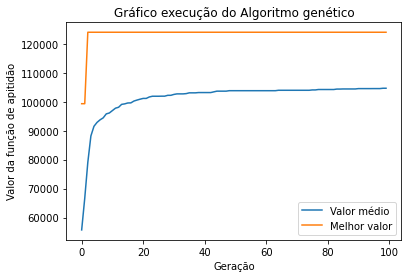

CPU times: user 5min 23s, sys: 14.5 s, total: 5min 38s
Wall time: 56.6 s


In [3]:
%%time
individual = ga(X,fitness_function="CalinskiHarabaz", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=2 )



In [4]:
individual.chromosome

array([[0.45940267, 0.5991299 ],
       [0.49227741, 0.34385228]])

In [5]:
individual.value

124029.21775855242

In [6]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

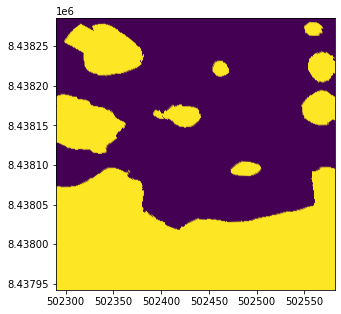

In [7]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

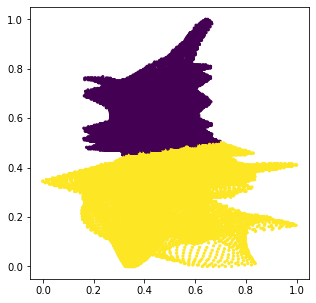

In [8]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [9]:
def describe(X, Y):
    for i in np.unique(Y):
        members_cluster = X[i == Y]
        print("Quandidade de amostras no grupo {}: {}".format(i, members_cluster.shape[0]))
        print("Média do grupo {}: {}".format(i, np.mean(members_cluster, axis=0)))
        print("Variancia do grupo {}: {}".format(i, np.var(members_cluster, axis=0)))
        print()
        print()

In [10]:
describe(X, Y)

Quandidade de amostras no grupo 0: 56601
Média do grupo 0: [0.45583922 0.59283678]
Variancia do grupo 0: [0.0075208  0.00886422]


Quandidade de amostras no grupo 1: 44191
Média do grupo 1: [0.49888513 0.3360441 ]
Variancia do grupo 1: [0.01693276 0.01139389]




## DaviesBouldin

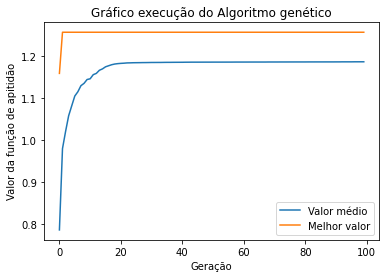

CPU times: user 9min 53s, sys: 26.8 s, total: 10min 20s
Wall time: 1min 43s


In [11]:
%%time
individual = ga(X,fitness_function="DaviesBouldin", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=2 )

In [12]:
individual.chromosome

array([[0.4446251 , 0.56240258],
       [0.5375479 , 0.30867495]])

In [13]:
individual.value

1.2566714197766997

In [14]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

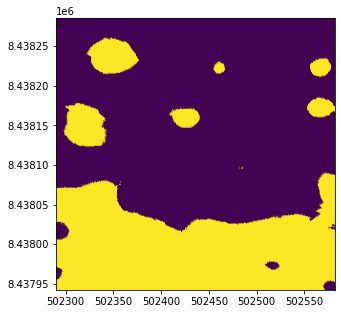

In [15]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

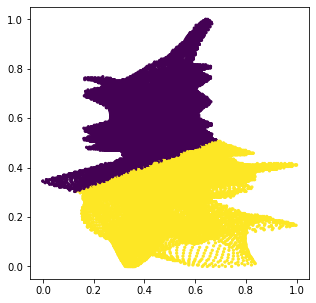

In [16]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [17]:
describe(X, Y)

Quandidade de amostras no grupo 0: 66008
Média do grupo 0: [0.45097623 0.57085902]
Variancia do grupo 0: [0.00789707 0.0106519 ]


Quandidade de amostras no grupo 1: 34784
Média do grupo 1: [0.51975475 0.30830318]
Variancia do grupo 1: [0.0169881  0.01058563]




## FPC

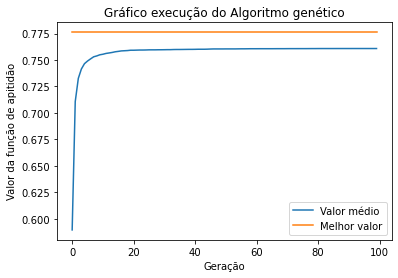

CPU times: user 14min 23s, sys: 43.4 s, total: 15min 7s
Wall time: 2min 31s


In [18]:
%%time
individual = ga(X,fitness_function="FPC", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=20 )

In [19]:
individual.chromosome

array([[0.47324714, 0.5444503 ],
       [0.47991753, 0.25213632]])

In [20]:
individual.value

0.7762386863335922

In [21]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

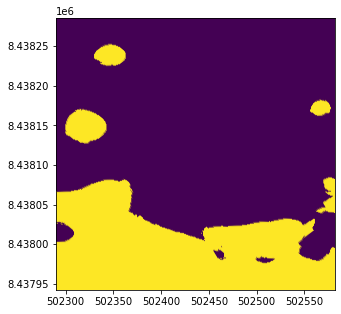

In [22]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

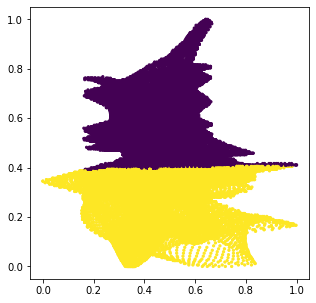

In [23]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [24]:
describe(X, Y)

Quandidade de amostras no grupo 0: 71500
Média do grupo 0: [0.46373282 0.56057551]
Variancia do grupo 0: [0.00827557 0.01108624]


Quandidade de amostras no grupo 1: 29292
Média do grupo 1: [0.50151206 0.28417762]
Variancia do grupo 1: [0.02043501 0.00892906]




## SSE

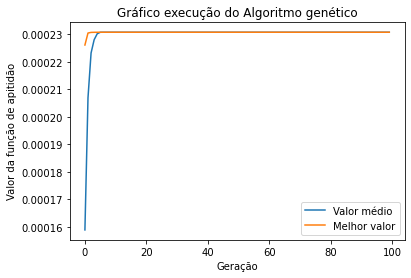

CPU times: user 5min 42s, sys: 15.6 s, total: 5min 58s
Wall time: 60 s


In [25]:
%%time
individual = ga(X,fitness_function="SumSquaredError", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=20 )

In [26]:
individual.chromosome

array([[0.50464505, 0.31781568],
       [0.45625699, 0.58039791]])

In [27]:
individual.value

0.000230809387604458

In [28]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

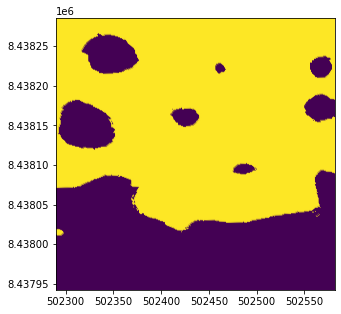

In [29]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

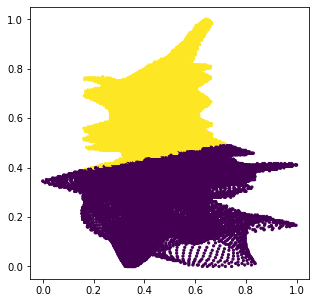

In [30]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [31]:
describe(X, Y)

Quandidade de amostras no grupo 0: 38442
Média do grupo 0: [0.50464505 0.31781568]
Variancia do grupo 0: [0.01840778 0.01051327]


Quandidade de amostras no grupo 1: 62350
Média do grupo 1: [0.45625699 0.58039791]
Variancia do grupo 1: [0.00732369 0.00958901]


